In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [2]:
import sys
sys.executable

'c:\\New folder\\ANN model\\venv\\python.exe'

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(columns=["RowNumber","CustomerId", "Surname"], inplace=True)

In [6]:
le= LabelEncoder()

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
trf = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(),[1,2])], remainder='passthrough')

In [9]:
le = LabelEncoder()

In [10]:
df['Gender'] = le.fit_transform(df['Gender'])

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [12]:
ohe = OneHotEncoder()

In [13]:
geo_encode = ohe.fit_transform(df[['Geography']])

In [14]:
ohe.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [15]:
df_geo = pd.DataFrame(geo_encode.toarray(), columns=[ohe.get_feature_names_out(['Geography'])])

In [16]:
df_geo

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [17]:
df = pd.concat([df.drop(columns=['Geography']), df_geo], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           10000 non-null  int64  
 1   Gender                10000 non-null  int32  
 2   Age                   10000 non-null  int64  
 3   Tenure                10000 non-null  int64  
 4   Balance               10000 non-null  float64
 5   NumOfProducts         10000 non-null  int64  
 6   HasCrCard             10000 non-null  int64  
 7   IsActiveMember        10000 non-null  int64  
 8   EstimatedSalary       10000 non-null  float64
 9   Exited                10000 non-null  int64  
 10  (Geography_France,)   10000 non-null  float64
 11  (Geography_Germany,)  10000 non-null  float64
 12  (Geography_Spain,)    10000 non-null  float64
dtypes: float64(5), int32(1), int64(7)
memory usage: 976.7 KB


In [19]:
with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(le,file)

with open('geo_encoder.pkl', 'wb') as file:
    pickle.dump(ohe,file)

In [20]:
x= df.drop(columns=['Exited'])
y = df['Exited']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [22]:
x_test.info()
x_train= x_train.rename(str,axis="columns")
x_test= x_test.rename(str, axis="columns")  

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 6252 to 6929
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           2000 non-null   int64  
 1   Gender                2000 non-null   int32  
 2   Age                   2000 non-null   int64  
 3   Tenure                2000 non-null   int64  
 4   Balance               2000 non-null   float64
 5   NumOfProducts         2000 non-null   int64  
 6   HasCrCard             2000 non-null   int64  
 7   IsActiveMember        2000 non-null   int64  
 8   EstimatedSalary       2000 non-null   float64
 9   (Geography_France,)   2000 non-null   float64
 10  (Geography_Germany,)  2000 non-null   float64
 11  (Geography_Spain,)    2000 non-null   float64
dtypes: float64(5), int32(1), int64(6)
memory usage: 195.3 KB


In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [24]:
with open("scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)

<Axes: >

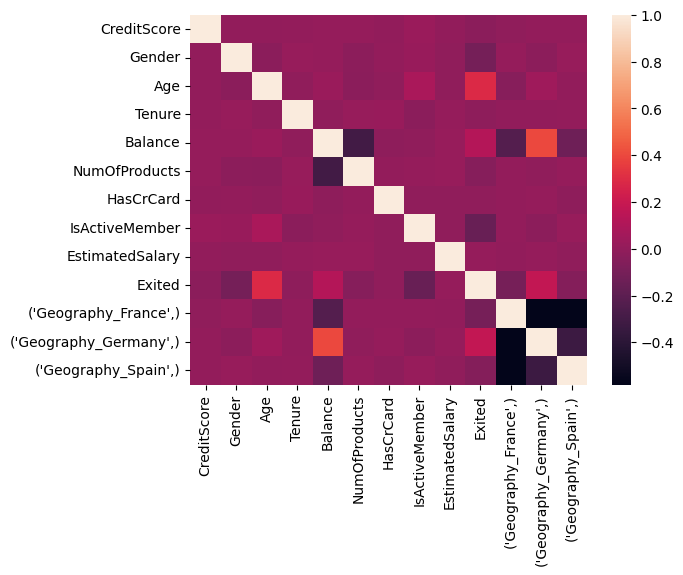

In [25]:
import seaborn as sns
df.corr(numeric_only=True)['Exited']
sns.heatmap(df.corr(numeric_only=True))

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [27]:
seq = Sequential([
    Dense(64, input_shape=(x_train.shape[1],), activation='relu'), #hidden layer 1
    Dense(32, activation='relu'), #hidden layer 2
    Dense(1, activation='sigmoid') #output layer
])

c:\New folder\ANN model\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
seq.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
opt = tf.keras.optimizers.Adam(learning_rate= 0.001)

In [29]:
seq.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

In [30]:
log_directory = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [31]:
log_directory

'logs/fit20240908-005903'

In [32]:
model_callbacks = TensorBoard(log_dir=log_directory, histogram_freq=1)

In [33]:
early_stopping_callbacks = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # patience=5 means 5 epochs wait

In [35]:
y_train.shape

(8000,)

In [36]:
import mlflow
mlflow.tensorflow.autolog(every_n_iter=2)

2024/09/08 00:59:45 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2024/09/08 00:59:45 WARNING mlflow.tensorflow: The `every_n_iter` parameter is deprecated, please use `log_every_epoch` and `log_every_n_steps` instead. Automatically set `log_every_n_steps` to `every_n_iter`.


In [37]:
history = seq.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[model_callbacks, early_stopping_callbacks]
)

2024/09/08 00:59:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8a41d5b8783c47dbac260fb31c2e9b55', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024/09/08 00:59:50 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Epoch 1/100
239/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7416 - loss: 0.5230

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7444 - loss: 0.5198 - val_accuracy: 0.8350 - val_loss: 0.3860
Epoch 2/100
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8407 - loss: 0.3842

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8407 - loss: 0.3841 - val_accuracy: 0.8525 - val_loss: 0.3510
Epoch 3/100
220/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.3554

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8603 - loss: 0.3549 - val_accuracy: 0.8600 - val_loss: 0.3448
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8626 - loss: 0.3324 - val_accuracy: 0.8575 - val_loss: 0.3490
Epoch 5/100
242/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 0.3450

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.3448 - val_accuracy: 0.8560 - val_loss: 0.3415
Epoch 6/100
220/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.3425

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8594 - loss: 0.3419 - val_accuracy: 0.8615 - val_loss: 0.3389
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8623 - loss: 0.3292 - val_accuracy: 0.8615 - val_loss: 0.3393
Epoch 8/100
220/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3430

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8635 - loss: 0.3414 - val_accuracy: 0.8635 - val_loss: 0.3379
Epoch 9/100
220/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.3415

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8555 - loss: 0.3399 - val_accuracy: 0.8620 - val_loss: 0.3370
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8710 - loss: 0.3228 - val_accuracy: 0.8605 - val_loss: 0.3381
Epoch 11/100
246/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8678 - loss: 0.3198

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8678 - loss: 0.3199 - val_accuracy: 0.8625 - val_loss: 0.3380
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8680 - loss: 0.3200 - val_accuracy: 0.8590 - val_loss: 0.3401
Epoch 13/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8706 - loss: 0.3149 - val_accuracy: 0.8595 - val_loss: 0.3401
Epoch 14/100
247/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.3228

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8585 - loss: 0.3227 - val_accuracy: 0.8620 - val_loss: 0.3392
Epoch 15/100
247/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3112

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8710 - loss: 0.3112 - val_accuracy: 0.8640 - val_loss: 0.3374
Epoch 16/100
222/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3128

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8692 - loss: 0.3132 - val_accuracy: 0.8615 - val_loss: 0.3372
Epoch 17/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8733 - loss: 0.3163 - val_accuracy: 0.8610 - val_loss: 0.3384
Epoch 18/100
221/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3130

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8696 - loss: 0.3131 - val_accuracy: 0.8620 - val_loss: 0.3382
Epoch 19/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.3038 - val_accuracy: 0.8655 - val_loss: 0.3417
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


2024/09/08 01:00:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\New folder\ANN model\venv\Lib\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils."


In [38]:
seq.save("model.h5")

In [39]:
train_loss, train_acc = seq.evaluate(x_test,  y_test, verbose=2)

63/63 - 0s - 755us/step - accuracy: 0.8620 - loss: 0.3370


In [40]:
import mlflow
from mlflow.models.signature import infer_signature
model_signature = infer_signature(x_test, seq.predict(x_test))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


In [41]:
exp_timestamp = datetime.datetime.now().strftime("%Y%m%d")
exp_name = "churn_model_time" + exp_timestamp
run_timestamp = datetime.datetime.now().strftime("%Y%m%d--%H%M%S")
run_name = "churn_model_run"+ run_timestamp

In [42]:
def tf_experiment_tracking(exp_name, run_name, train_loss, train_acc, model_signature):
    mlflow.set_experiment(exp_name)
    with mlflow.start_run(run_name=run_name):
        mlflow.log_param("batch_size", 128)
        mlflow.log_param("learning_rate", 0.001)
        mlflow.log_param("epochs", 100)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.tensorflow.log_model(seq, "churn", signature=model_signature)
    mlflow.end_run()

In [42]:
tf_experiment_tracking(exp_name, run_name, train_loss, train_acc, model_signature)

2024/07/15 23:29:53 INFO mlflow.tracking.fluent: Experiment with name 'churn_model_time20240715' does not exist. Creating a new experiment.


In [43]:
%load_ext tensorboard

In [44]:
%tensorboard --logdir logs/fit